In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Datasets/PlayTennis.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
X = df.drop("play", axis=1)
y = df["play"]
X.head()

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False


In [6]:
label_encoder = {}
for cols in X.columns:
    le = LabelEncoder()
    X[cols] = le.fit_transform(X[cols])
    label_encoder[cols] = le


In [7]:
tle = LabelEncoder()
y = tle.fit_transform(y)

In [8]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
clf.fit(X,y)


DecisionTreeClassifier(criterion='entropy', random_state=42)

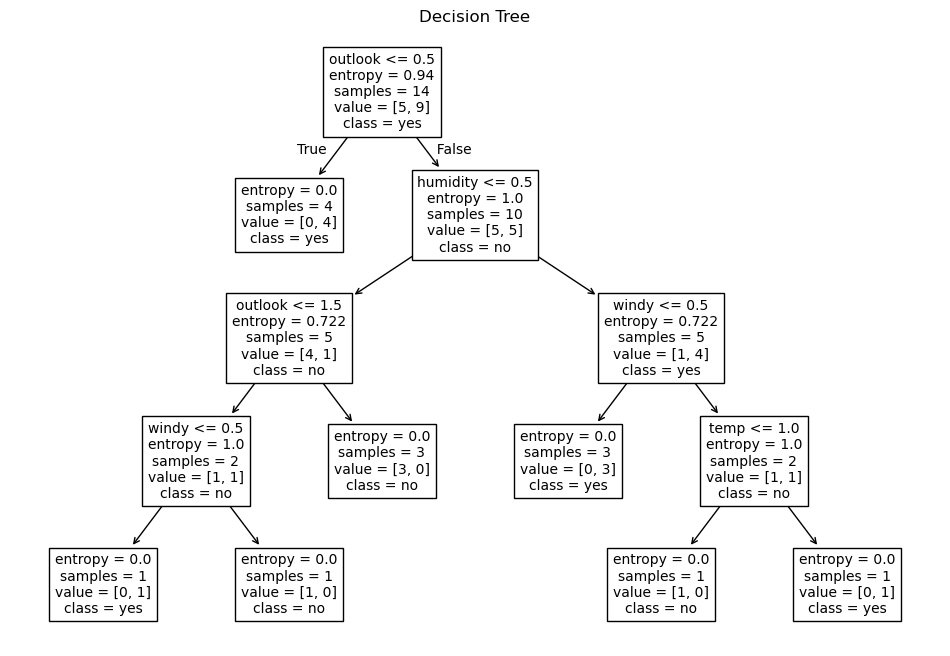

In [21]:
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=X.columns,class_names=tle.classes_,fontsize=10)
plt.title('Decision Tree')
plt.show()

In [16]:
sample_datapoint = {
"outlook": "sunny",
"temp": "cool",
"humidity": "high",
"windy": "strong"
}
sample_df = pd.DataFrame([sample_datapoint])


In [17]:
for col, le in label_encoder.items():
    sample_df[col] = le.fit_transform(sample_df[col])

In [18]:
pec = clf.predict(sample_df)
pred_class=  tle.inverse_transform(pec)
print(pred_class)

['yes']


In [19]:
print(f"new sample datapoint:{sample_datapoint}")
print(f"Predicted class:{pred_class}")

new sample datapoint:{'outlook': 'sunny', 'temp': 'cool', 'humidity': 'high', 'windy': 'strong'}
Predicted class:['yes']
